## TP2 &ndash; Fonctions génératrices

Indiquez vos noms ici:

- Judith Lecoq
- Elliott Vanwormhoudt

On peut travailler dans Sage avec des séries de puissances aussi aisément qu'avec des polynômes; il suffit de déclarer notre envie de le faire.

In [21]:
R.<x> = PowerSeriesRing(QQ)  # anneau des séries entières à coefficients rationnels

Dans les faits, on ne travaille jamais avec tous les termes d'une série mais plutôt avec sa troncature à un ordre donné (20 par défaut):

In [22]:
1/(1+x)

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + O(x^20)

mais on peut changer celui-ci à la baisse si on le souhaite:

In [23]:
1/(1+x) + O(x^5)

1 - x + x^2 - x^3 + x^4 + O(x^5)

ou encore à la hausse (mais pour cela il faut augmenter la précision au niveau de l'anneau).

In [24]:
1/(1+x) + O(x^30)  # ne fait pas ce qu'on pourrait croire

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + O(x^20)

In [25]:
R.set_default_prec(30)

In [26]:
1/(1+x)  # ok

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + x^20 - x^21 + x^22 - x^23 + x^24 - x^25 + x^26 - x^27 + x^28 - x^29 + O(x^30)

On peut effectuer toutes les opérations arithmétiques de base sur ces séries; et on peut passer d'une liste de coefficient à une série et vice-versa de la façon suivante.

In [27]:
f = R([1,2,3,4,5]); f

1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4

In [28]:
f.prec()

+Infinity

Notez que la série considérée à l'instant n'est __pas__ tout à fait la transformée en $z$ de la suite $(1,2,3,4,5,0,0,\ldots)$: pour cela il faudrait plutôt poser $x = 1/z$ et utiliser $z$ comme variable.

Étant donné une suite $(a_n)_{n\in\mathbf{N}}$, on appelle $\displaystyle f(x) = \sum_{n=0}^\infty a_n x^n$ la __fonction génératrice__ de la suite (sans trop se soucier ici des questions de convergence). Sa transformée en $z$ est $f(z^{-1})$ qui a de bonnes propriétés théoriques; pour le calcul numérique (comme ici) il est souvent plus simple de travailler directement avec $f(x)$.

Voici par exemple la fonction génératrice d'une suite célèbre:

In [29]:
R.<x> = PowerSeriesRing(QQ)

F = 1/(1 - x - x^2)  # z^2/(z^2 - z - 1)

F

1 + x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + 13*x^6 + 21*x^7 + 34*x^8 + 55*x^9 + 89*x^10 + 144*x^11 + 233*x^12 + 377*x^13 + 610*x^14 + 987*x^15 + 1597*x^16 + 2584*x^17 + 4181*x^18 + 6765*x^19 + 10946*x^20 + 17711*x^21 + 28657*x^22 + 46368*x^23 + 75025*x^24 + 121393*x^25 + 196418*x^26 + 317811*x^27 + 514229*x^28 + 832040*x^29 + O(x^30)

## A) Partages

À la maison j'ai 42 biscuits et deux garçons: le grand les mange 3 par 3 et le petit 2 par 2. De combien de façons cela peut-on répartir les 42 biscuits en tas de 2 ou de 3 ?

Si on formalise la question, il s'agit de compter le nombre de façons d'écrire $42 = 2 a + 3 b$, soit $x^{42} = (x^2)^a (x^3)^b$. Il s'agit donc du coefficient de $x^{42}$ dans l'expression

$$ (1 + x^2 + x^4 + x^6 + \cdots)(1 + x^3 + x^6 + x^9 + \cdots) = \sum_{a = 0}^\infty (x^2)^a \cdot \sum_{b = 0}^\infty (x^3)^b = \frac{1}{1 - x^2} \cdot \frac{1}{1 - x^3}. $$

In [43]:
R.set_default_prec(43)

(1/(1-x^2) * 1/(1-x^3)).padded_list()[42]

8

Il y a donc 8 façons de répartir les biscuits en tas de 2 ou 3; vérifions:

In [44]:
for a in range(22):
    if (42 - 2*a) % 3 == 0:
        b = (42 - 2*a) / 3
        print (a,b)

0 14
3 12
6 10
9 8
12 6
15 4
18 2
21 0


Ce qui est bien c'est que cette méthode se généralise aisément: le nombre de façons de répartir $n$ objets en $k$ tas par paquets de tailles respectives $m_1, \ldots, m_k$ est le coefficient de $x^n$ dans la fonction génératrice

$$ \prod_{i = 1}^k \frac{1}{1 - x^{m_i}}. $$

En d'autres termes: le coefficient de $x^n$ dans cette expression est le nombre de $k$-uplets $(a_1, \ldots, a_k)$ pour lesquels $\sum_{i=1}^k m_i a_i = n$.

__Question 1__. En utilisant cette méthode, déterminer le nombres de façons de répartir $10$ biscuits entre $2$ enfants:

a) si on suppose qu'on les distribue tous;

b) si on se permet d'en manger quelques-uns.

Les réponses vous semblent-elles cohérentes ?

In [45]:
print("a)Pour 2 enfants : %d" % (1/(1-x^1)*(1/(1-x^1))).padded_list()[10])

print("\nb)")
f = (1/(1-x^1))*(1/(1-x^1))
for i in range(3,9,1):
    f *= (1/(1-x^1))
    print("Pour %d enfants: %d" % (i,f.padded_list()[10]))

a)Pour 2 enfants : 11

b)
Pour 3 enfants: 66
Pour 4 enfants: 286
Pour 5 enfants: 1001
Pour 6 enfants: 3003
Pour 7 enfants: 8008
Pour 8 enfants: 19448


__Question 2__. De combien de façons peut-on rendre 1,47 € en monnaie ?

In [46]:
R.set_default_prec(148)


nbr = ( (1/(1-x^1)) * (1/(1-x^2)) * (1/(1-x^5)) * (1/(1-x^10)) * (1/(1-x^20)) * (1/(1-x^50)) * (1/(1-x^100)) ).padded_list()[147]
print("Il y a %d facon de rendre 1,47 euro en monnaie." % nbr)

Il y a 20116 facon de rendre 1,47 euro en monnaie.


__Question 3__. De combien de façons peut-on écrire $20$ comme la somme d'entiers positifs ? Distinguer selon que l'on tienne compte de l'ordre des termes ou pas.

In [47]:
R.set_default_prec(21)
s1 ,s2 = 1,0
for i in range(1, 20):
    s1 *= 1/(1-x^i)
    s2 += (x/(1-x))^i

print("Sans prendre en compte l'ordre des termes : %d" % s1.padded_list()[20])
print("En prenant en compte l'ordre des termes : %d" % s2.padded_list()[20])

Sans prendre en compte l'ordre des termes : 626
En prenant en compte l'ordre des termes : 524287


## B) Parenthésages balancés

On appelle _mot de Dyck_ toute chaîne de caractères ne comportant que des ( et des ) et représentant une expression bien balancée (toute parenthèse ouvrante finira par se refermer un peu plus loin; et on ne peut pas refermer une paire de parenthèses avant de l'avoir ouverte).

__Question 1__. Écrire une fonction récursive __dyck($n$)__ renvoyant la liste de tous les mots de Dyck de longueur $2n$ (donc comportant $n$ paires de parenthèses). Donner la liste des 42 mots de Dyck de longueur 10.

In [48]:
def dyck(n):
    if(n== 0):
        return ['']
    
    mots = []
    
    for i in range(0,n):
        for j in dyck(i):
            for k in dyck(n-i-1):
                mots.append('(' + j + ')'+k)
                
    return mots

show(dyck(5))

['()()()()()',
 '()()()(())',
 '()()(())()',
 '()()(()())',
 '()()((()))',
 '()(())()()',
 '()(())(())',
 '()(()())()',
 '()((()))()',
 '()(()()())',
 '()(()(()))',
 '()((())())',
 '()((()()))',
 '()(((())))',
 '(())()()()',
 '(())()(())',
 '(())(())()',
 '(())(()())',
 '(())((()))',
 '(()())()()',
 '(()())(())',
 '((()))()()',
 '((()))(())',
 '(()()())()',
 '(()(()))()',
 '((())())()',
 '((()()))()',
 '(((())))()',
 '(()()()())',
 '(()()(()))',
 '(()(())())',
 '(()(()()))',
 '(()((())))',
 '((())()())',
 '((())(()))',
 '((()())())',
 '(((()))())',
 '((()()()))',
 '((()(())))',
 '(((())()))',
 '(((()())))',
 '((((()))))']

__Question 2__. La longueur $C_n$ de la liste renvoyée par __dyck($n$)__ satisfait l'équation de récurrence

$$ C_{n+1} = \sum_{k=0}^n C_k C_{n-k}. $$

Utiliser celle-ci pour obtenir les valeurs de $C_n$ pour $n \in [\![ 0, 100 ] \! ]$ afin d'observer graphiquement l'allure des premiers termes de la suite.

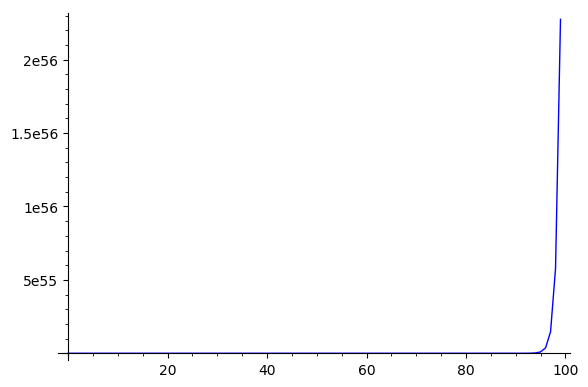

In [49]:
R.set_default_prec(101)
def C(n):
    somme = 0
    longueur = []
    for i in range(n):
        if (i <= 0):
            somme = 1
        else:
            somme = 0
            for j in range(i):
                somme += longueur[j] * longueur[i - j - 1]
        longueur.append(somme)
    return longueur

list_plot(C(100), plotjoined=True)

__Question 3__. Confirmer vos valeurs trouvées à la question précédente avec les 101 premiers coefficients de la fonction génératrice

$$ C(x) = \sum_{n=0}^\infty C_n x^n = \frac{1 - \sqrt{1 - 4x}}{2x}. $$

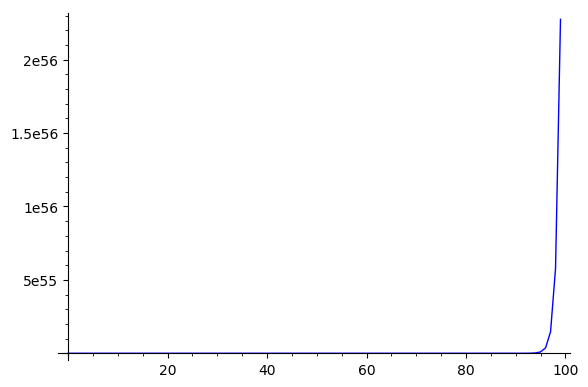

In [50]:
list_plot((((1 - sqrt(1 - 4*x)) / (2*x)).padded_list(100)), plotjoined=True)